In [1]:
import pandas as pd
import seaborn as sns
import re

In [2]:
pd.options.display.max_columns=35

In [3]:
ta_df = pd.read_excel('E:\symbiosis\Training_Analysis.xlsx')

In [4]:
ta_df.head()

,Timestamp,Email Address,Date,Name of Course,Batch code,Name of Trainer,The objectives of the training were clearly defined,Knowledge of the subject matter,Participation and interaction were relevant to me,The topics covered were relevant to me,The contents was organized and easy to follow,The training experience will be useful in my work,Ability to explain and illustrate concepts,Ability to answer questions completely,The trainer was well prepared,What specifically did the trainer do well?,What recommendations do you have for the trainer to improve?,The usefulness of the information received in training.,The structure of the training session(s).,The convenience of the training schedule,The usefulness of the training materials,Was this training appropriate for your level of experience? \t,What did you most like about the training?,"What can be improved with regard to the structure, format, and/or materials?",Trainer,Is there anything that needs to be done with the help of the Head academics?
0,2022-02-03 16:21:05.112,headacademics@gmail.com,NaT,sfsdf,sdfdsf,dfs,NaN,3,NaN,NaN,NaN,NaN,3,3,NaN,sads,sadas,2,2,2,3,No,ff,sasdasd,NaN,NaN
1,2022-02-08 15:40:20.482,rohineechaudhari13@gmail.com,2022-02-08,Data Analytics,DA17,Ritviz sir,NaN,4,NaN,NaN,NaN,NaN,4,4,NaN,He is clearing our concepts explaining so many...,Spray be some time you should strict for us.,5,5,5,5,Yes,Sir I will easily understood all concept and l...,Sir may be every sessions notes provide in tex...,NaN,NaN
2,2022-02-08 15:40:55.173,madhurigaikwad0205@gmail.com,2000-09-08,Madhuri Mohan Gaikwad,Python,NaN,NaN,5,NaN,NaN,NaN,NaN,5,5,NaN,Yes,Yes,5,5,5,5,Yes,Yes,Yes,NaN,NaN
3,2022-02-08 15:42:06.732,ashug5467@gmail.com,2022-02-08,Robotic process and automation,robotic process and automation,mubin mujaheed sir,NaN,5,NaN,NaN,NaN,NaN,5,5,NaN,explaination of every topic,notes of specific topic can be a good resource...,5,4,4,3,Yes,its free and usefull,i will be good if you can provide recordings s...,NaN,NaN
4,2022-02-08 15:44:21.104,imteyazahmad8888@gmail.com,NaT,Md Imteyaz Ahmad Abdul Majid,Machine Learning,Ankita Kanchan,NaN,4,NaN,NaN,NaN,NaN,4,4,NaN,Motivation,Deep knowledge of Statistics and ML,4,4,4,4,Yes,Giving quality of training free of cost.,Add some extra syllabus of ML and Statistics,NaN,NaN


In [5]:
ta_df.shape

(269, 26)

In [6]:
ta_df.columns

Index(['Timestamp', 'Email Address', 'Date', 'Name of Course', 'Batch code',
       'Name of Trainer',
       'The objectives of the training were clearly defined',
       'Knowledge of the subject matter',
       'Participation and interaction were relevant to me',
       'The topics covered were relevant to me',
       'The contents was organized and easy to follow',
       'The training experience will be useful in my work',
       'Ability to explain and illustrate concepts',
       'Ability to answer questions completely',
       'The trainer was well prepared',
       'What specifically did the trainer do well?',
       'What recommendations do you have for the trainer to improve?',
       'The usefulness of the information received in training.',
       'The structure of the training session(s).',
       'The convenience of the training schedule',
       'The usefulness of the training materials',
       'Was this training appropriate for your level of experience? \t',
       'W

In [7]:
ta_df.columns = ['Timestamp', 'Email', 'Date', 'Course', 'Batch_code','TrainerName', 
                 'obj_clearly_defined', 'knowledge_subject_matter','part_interaction_relevant',
                 'topics_covered','contents_organized', 'useful',
                 'explain_illustrate_concepts','answers_questions_completely','trainer_prepared',
                 'speciality', 'recommendations_to_improve', 'usefulness_info_in_training',
                 'structure_training session','convenience_training_schedule',
                 'usefulness_training_materials',  'experience_releveant_training', 
                 'best_abt_training','improvement','Trainer','suggestion']

In [8]:
ta_df['Trainer'].fillna("", inplace = True)
ta_df['TrainerName'].fillna("",inplace = True)

In [9]:
ta_df['Final_name'] = ta_df['TrainerName']+ta_df['Trainer']

In [10]:
ta_df[['TrainerName','Trainer','Final_name']]

,TrainerName,Trainer,Final_name
0,dfs,,dfs
1,Ritviz sir,,Ritviz sir
2,,,
3,mubin mujaheed sir,,mubin mujaheed sir
4,Ankita Kanchan,,Ankita Kanchan
...,...,...,...
264,,Mr. Prasad Deshpande(Software testing),Mr. Prasad Deshpande(Software testing)
265,,Ms Amrita Ajotikar (Machine learning),Ms Amrita Ajotikar (Machine learning)
266,,Ms Amrita Ajotikar (Machine learning),Ms Amrita Ajotikar (Machine learning)
267,,Ms Amrita Ajotikar (Machine learning),Ms Amrita Ajotikar (Machine learning)


In [11]:
ta_df.Final_name.isna().sum()

0

In [12]:
ta_df.shape

(269, 27)

In [13]:
ta_df.head()

,Timestamp,Email,Date,Course,Batch_code,TrainerName,obj_clearly_defined,knowledge_subject_matter,part_interaction_relevant,topics_covered,contents_organized,useful,explain_illustrate_concepts,answers_questions_completely,trainer_prepared,speciality,recommendations_to_improve,usefulness_info_in_training,structure_training session,convenience_training_schedule,usefulness_training_materials,experience_releveant_training,best_abt_training,improvement,Trainer,suggestion,Final_name
0,2022-02-03 16:21:05.112,headacademics@gmail.com,NaT,sfsdf,sdfdsf,dfs,NaN,3,NaN,NaN,NaN,NaN,3,3,NaN,sads,sadas,2,2,2,3,No,ff,sasdasd,,NaN,dfs
1,2022-02-08 15:40:20.482,rohineechaudhari13@gmail.com,2022-02-08,Data Analytics,DA17,Ritviz sir,NaN,4,NaN,NaN,NaN,NaN,4,4,NaN,He is clearing our concepts explaining so many...,Spray be some time you should strict for us.,5,5,5,5,Yes,Sir I will easily understood all concept and l...,Sir may be every sessions notes provide in tex...,,NaN,Ritviz sir
2,2022-02-08 15:40:55.173,madhurigaikwad0205@gmail.com,2000-09-08,Madhuri Mohan Gaikwad,Python,,NaN,5,NaN,NaN,NaN,NaN,5,5,NaN,Yes,Yes,5,5,5,5,Yes,Yes,Yes,,NaN,
3,2022-02-08 15:42:06.732,ashug5467@gmail.com,2022-02-08,Robotic process and automation,robotic process and automation,mubin mujaheed sir,NaN,5,NaN,NaN,NaN,NaN,5,5,NaN,explaination of every topic,notes of specific topic can be a good resource...,5,4,4,3,Yes,its free and usefull,i will be good if you can provide recordings s...,,NaN,mubin mujaheed sir
4,2022-02-08 15:44:21.104,imteyazahmad8888@gmail.com,NaT,Md Imteyaz Ahmad Abdul Majid,Machine Learning,Ankita Kanchan,NaN,4,NaN,NaN,NaN,NaN,4,4,NaN,Motivation,Deep knowledge of Statistics and ML,4,4,4,4,Yes,Giving quality of training free of cost.,Add some extra syllabus of ML and Statistics,,NaN,Ankita Kanchan


In [14]:
ta_df.drop(0, inplace = True)

In [15]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 1 to 268
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Timestamp                      268 non-null    datetime64[ns]
 1   Email                          268 non-null    object        
 2   Date                           252 non-null    datetime64[ns]
 3   Course                         268 non-null    object        
 4   Batch_code                     239 non-null    object        
 5   TrainerName                    268 non-null    object        
 6   obj_clearly_defined            244 non-null    float64       
 7   knowledge_subject_matter       268 non-null    int64         
 8   part_interaction_relevant      244 non-null    float64       
 9   topics_covered                 244 non-null    float64       
 10  contents_organized             244 non-null    float64       
 11  useful             

In [16]:
ta_df.columns

Index(['Timestamp', 'Email', 'Date', 'Course', 'Batch_code', 'TrainerName',
       'obj_clearly_defined', 'knowledge_subject_matter',
       'part_interaction_relevant', 'topics_covered', 'contents_organized',
       'useful', 'explain_illustrate_concepts', 'answers_questions_completely',
       'trainer_prepared', 'speciality', 'recommendations_to_improve',
       'usefulness_info_in_training', 'structure_training session',
       'convenience_training_schedule', 'usefulness_training_materials',
       'experience_releveant_training', 'best_abt_training', 'improvement',
       'Trainer', 'suggestion', 'Final_name'],
      dtype='object')

In [17]:
batch_wise_cnt =ta_df['Batch_code'].value_counts()

In [18]:
ta_df.Batch_code.unique()

array(['DA17', 'Python ', 'robotic process and automation',
       'Machine Learning ', 'RPA', 'FST RPA13', 'Data associate', 'ML-22',
       'Machine learning analyst', 'Python', 'Basic Stastics and Python',
       'ML7', 'ML 25', 'Machine learning And Ai analyst',
       'IoT hardware Solutions Designer', 'Data science', 'ML-24',
       'Machine learning ', 'Future Ready Skills Training', 'DA 18',
       'ML24', 'ML 22 ', 'ML - Batch 21', 'Introduction', 24, 'DA-18',
       nan, 'SDA-FSD-01-01', 'SDA-FSD-01-02', 'SDA-SWT-01-01',
       'SDA SWT 01 01', 1, 'SDA-FSA-11-01', ' SDA-FSD-01-01',
       'SDA-FSD-11-01', 'SDA-FSC-11-01', 'SDA-SWT-12-01', 'Fsd-01-01',
       'SDA-FSD-0101', 'Fsd-11', '  SDA-SWT-12-01', '04-01',
       'SDA-FSD-04-1', 'SDA-FSD-04-01', 'Ml-24', 'DA21', 'RPA - 14',
       'DA18', 'DA19', 'DA-20', 'SDAFSD0401', 'Da 20', 'R15',
       'Sda-fsd-04-01', 19, 'ML25', '-', 'Leave it blank ',
       'Leave it blank', 'FST ML2.O', 'FST 2.0 ML 2', 'FST2.0 ML_2',
       'F

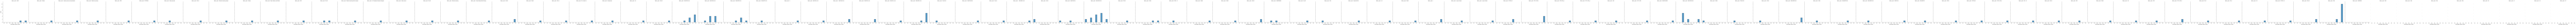

In [17]:
sns.displot(data=ta_df, x='knowledge_subject_matter', col= 'Batch_code')

In [18]:
#sns.histplot(data=ta_df, x='Batch_code', )

In [19]:
ta_df['Course'].value_counts()

Machine Learning Engineer – AI Analyst                     85
Java Full Stack                                            79
software Testing                                           30
Data Associate                                             25
CNC Programmer                                             15
Robotics Process Automation                                 4
Machine learning                                            3
Machine Learning                                            3
Machine Learning Engineer – AI Analyst, Aptitude Test       3
Java Full Stack, Aptitude Test, Soft Skill                  2
Java Full Stack, Soft Skill                                 1
Data Analyst                                                1
Machine learning                                            1
Machine learning and AI                                     1
Md Imteyaz Ahmad Abdul Majid                                1
FSD                                                         1
RPA     

In [20]:
import re

In [21]:
ta_df.Final_name

1                                             Ritviz sir
2                                                       
3                                     mubin mujaheed sir
4                                        Ankita Kanchan 
5                                           Pranav Khote
                             ...                        
264               Mr. Prasad Deshpande(Software testing)
265                Ms Amrita Ajotikar (Machine learning)
266                Ms Amrita Ajotikar (Machine learning)
267                Ms Amrita Ajotikar (Machine learning)
268    Mr.Kushal Sharma(Machine learning/Data associate)
Name: Final_name, Length: 268, dtype: object

In [28]:
ta_df.Final_name.nunique()

33

In [29]:
ta_df.Final_name.unique()

array(['Ritwiz Singh', '', 'Mubeen Mujahid', 'Ankita Kanchan',
       'Pranav Khote', 'Raj Kolhe', 'Pradeep Khare', 'Shital Sunil More ',
       'Akshay Shinde ', 'Amrita Ajotikar', 'Pooja Telavane', 'Abhay',
       'Girish Godbole', 'Trupti Sathe', 'Mansi Deshpande',
       'Pratima Joshi', 'Mayuri Raghunath Mali', 'Vaibhav Barde',
       'Manasi Deshpande', 'Rushikesh Shinde ', 'Pratima joshi',
       'Akash Shivaji Karanje', 'Kushal Sharma', 'Mandar Sonwane',
       'PRAMOD DHONDIRAM KHANDARE ', 'Anil Nagnath Lakde',
       'Jagdish Nagargoje', 'Chaitali Bhalekari', 'Apurva Shahane',
       'Rupali Memane', 'Omkar Wagh', 'Tahera Shaikh',
       'Mr. Prasad Deshpande(Software testing)'], dtype=object)

In [26]:
def name_update(x):
    print(x)
    #print(re.finditer("Girish",x))
    
    if (x!= "Ritwiz Singh") and (re.search("Ritviz",x) or re.search("Ritwiz",x)):
        return 'Ritwiz Singh'
    elif (x!= 'Mubeen Mujahid') and  (re.search("mujaheed",x) or re.search("Mujaheed",x) or re.search("Mujahid",x)):
        return 'Mubeen Mujahid'
    elif (x!= 'Vaibhav Barde') and  re.search("Vaibhav",x) :
        return 'Vaibhav Barde'
    elif (x!= 'Ankita Kanchan') and re.search("Ankita",x):
        return 'Ankita Kanchan'
    elif (x!= 'Mandar Sonwane') and re.search("Mandar",x):
        return 'Mandar Sonwane'
    elif (x!= 'Raj Kolhe') and re.search("Raj",x):
        return 'Raj Kolhe'
    elif x == 'Mrunalsinh Patil':
        return 'Amrita Ajotikar'    
    elif (x!= 'Pradeep Khare') and  (re.search("Pradeep",x) or re.search("Pradip",x)):
        return 'Pradeep Khare'

    elif (x!= 'Pradeep Khare') and  (re.search("Pradeep",x) or re.search("Pradip",x)):
        return 'Pradeep Khare'
    elif (x!= 'Jagdish Nagargoje') and  (re.search("Jagdish",x) or re.search("Jagdesh",x) or re.search("Gagdish",x)):
        return 'Jagdish Nagargoje'
    elif (x!= "Pratima Joshi") and (re.search("Pratima",x) or re.search("pratima",x)):
        return 'Pratima Joshi'
    elif (x!= 'Trupti Sathe') and (re.search("Trupti",x) or re.search("Tripti",x)):
        return 'Trupti Sathe'
    elif (x!= "Tahera Shaikh") and re.search("Tahera",x):
        return 'Tahera Shaikh'
    elif (x!= "Kushal Sharma") and (re.search("Kushal",x) or re.search("kushal",x)):
        return 'Kushal Sharma'
    elif (x!= "Amrita Ajotikar") and (re.search("Amrita",x) or re.search("Amruta",x)):
        return 'Amrita Ajotikar'
    elif (x!= "Girish Godbole") and re.search("Girish",x):
        return 'Girish Godbole'
    elif (x!= "Pratima joshi") and re.search("Pratima",x):
        return 'Pratima joshi'
    elif (x!= "Apurva Shahane") and re.search("Apurva",x):
        return 'Apurva Shahane'
    
    elif (x!= "Apurva") and re.search("Apoorva",x):
        return 'Apurva Shahane'
    
    else:
        return x

In [27]:
ta_df.Final_name = ta_df['Final_name'].apply(name_update)

Ritviz sir

mubin mujaheed sir
Ankita Kanchan 
Pranav Khote
Mr.Mubeen Mujahid
Raj
Mr. Pradeep
Shital Sunil More 
Pradeep
Pradeep
Ankita kanchan
Pradeep sir
Ankita Kanchan
Akshay Shinde 
Ritviz sigh
Amrita Ajotikar
Pooja Telavane
Pooja Telavane
Ritviz Singh
Amruta Mam
Pradeep Sir 
Abhay
Raj Kolhe
Amrita helwalkar
Ritwiz Singh
Girish Godbole
Trupti Sathe
Mansi Deshpande
Pratima Joshi mam
Pratima joshi
Trupti sathe Mam
Prof. Pratima Joshi
Tripti sathe
Raj Kolhe
Trupti Sathe 
Raj kolhe sir
Raj kolhe
Trupti Sathe
Raj sir
Girish Godbole
Trupti mam
Trupti amit sathe mam
Mayuri Raghunath Mali
Mr.Raj kohle sir
Trupti sathe mam
Vaibhav Barde
Trupti Sathe mam
Mansi Deshpande
Mansi Deshpande
Manasi Deshpande
Girish Godbole sir
pratima joshi
Mansi Deshpande
Manasi Deshpande
Trupti sathe mam
Trupti Sathe 
Trupti sathi 
Rushikesh Shinde 
Girish Godbole
Pratima Joshi 
Pratima Joshi
Girish Sir
Raj Kolhe
Raj kolhe
Girish Godbole 
Mrs.Pratima Joshi
Mis. Pratima Joshi
Akash Shivaji Karanje
Girish Godbole


In [30]:
import matplotlib

## Trainer wise Feedback count received

<AxesSubplot:>

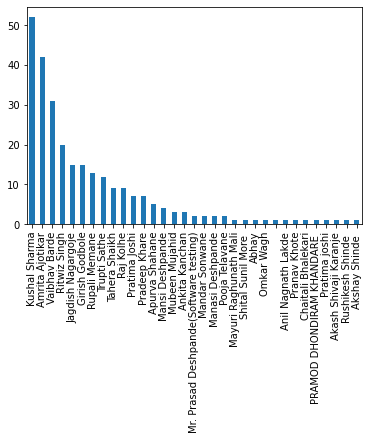

In [31]:
ta_df['Final_name'].value_counts().plot(kind = 'bar')

In [39]:
batch_wise_trainer = ta_df.groupby(['Batch_code', 'Final_name'])

In [41]:
batch_wise_cnt

SDA-FSD-04-01    18
ML4              18
ML2              14
ML3              12
DA1              12
                 ..
Da 20             1
S4                1
ML - Batch 21     1
Ml 3              1
SDA-FSC-11-01     1
Name: Batch_code, Length: 100, dtype: int64

In [33]:
trainer_wise_analysis = ta_df.groupby('Final_name')

In [34]:
trainer_wise_analysis.mean()

,obj_clearly_defined,knowledge_subject_matter,part_interaction_relevant,topics_covered,contents_organized,useful,explain_illustrate_concepts,answers_questions_completely,trainer_prepared,usefulness_info_in_training,structure_training session,convenience_training_schedule,usefulness_training_materials,suggestion
Final_name,,,,,,,,,,,,,,
,NaN,5.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,5.000000,5.000000,5.000000,5.000000,NaN
Abhay,NaN,5.000000,NaN,NaN,NaN,NaN,5.000000,5.000000,NaN,5.000000,3.000000,3.000000,5.000000,NaN
Akash Shivaji Karanje,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN
Akshay Shinde,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,4.000000,NaN
Amrita Ajotikar,4.775000,4.785714,4.725000,4.725000,4.725000,4.725000,4.738095,4.738095,4.775000,4.642857,4.690476,4.619048,4.714286,NaN
Anil Nagnath Lakde,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,NaN
Ankita Kanchan,NaN,4.000000,NaN,NaN,NaN,NaN,4.666667,3.666667,NaN,4.000000,4.333333,4.000000,4.000000,NaN
Apurva Shahane,3.200000,4.000000,3.400000,3.200000,2.600000,2.800000,2.600000,2.400000,2.800000,3.400000,4.400000,3.800000,3.400000,NaN
Chaitali Bhalekari,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN
